In [1]:
# A sentiment analysis job about the problems of each major U.S. airline. 
# Twitter data was scraped from February of 2015 and contributors were asked to first classify 
# positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").

In [2]:
import numpy as np
import pandas as pd

In [3]:
# Read the file data.csv. The enconding is important for the @ in the column text
# Show the first few records
data = pd.read_csv("./Tweets.csv", encoding="ISO-8859-1")
data.head()

tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1                    NaN    jnardino                 NaN              0   
2                    NaN  yvonnalynn                 NaN              0   
3                    NaN    jnardino                 NaN              0   
4                    NaN    jnardino                 NaN              0   

                                                text tweet_coord  \
0                @VirginAmerica What @dhepburn said.         NaN   
1  @VirginAmerica plus you've added commercials t...         NaN   
2  @VirginAmerica I didn't today... Must mean I n...         NaN   
3  @VirginAmerica it's really aggressive to blast...         NaN   
4  @VirginAmerica and it's a really big bad thing...         NaN   

               tweet_created tweet_location               user_timezone  
0  2015-02-24 11:35:52 -0800            NaN  Eastern Time (US & Canada)  
1  2015-02-24 11:15:59 -0800            NaN  Pacific Time (US & Canada)  
2  2015-02-24 11:15:48 -0800      Lets Play  Central Time (US & Canada)  
3  2015-02-24 11:15:36 -0800            NaN  Pacific Time (US & Canada)  
4  2015-02-24 11:14:45 -0800            NaN  Pacific Time (US & Canada)

In [4]:
# Show the general information about the data
data.describe()

tweet_id  airline_sentiment_confidence  negativereason_confidence  \
count  1.464000e+04                  14640.000000               10522.000000   
mean   5.692184e+17                      0.900169                   0.638298   
std    7.791112e+14                      0.162830                   0.330440   
min    5.675883e+17                      0.335000                   0.000000   
25%    5.685592e+17                      0.692300                   0.360600   
50%    5.694779e+17                      1.000000                   0.670600   
75%    5.698905e+17                      1.000000                   1.000000   
max    5.703106e+17                      1.000000                   1.000000   

       retweet_count  
count   14640.000000  
mean        0.082650  
std         0.745778  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max        44.000000

In [5]:
# Give the dimensions of the data
data.shape

(14640, 15)

In [6]:
# Give for each column the number of values available
data.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
airline_sentiment_gold             40
name                            14640
negativereason_gold                32
retweet_count                   14640
text                            14640
tweet_coord                      1019
tweet_created                   14640
tweet_location                   9907
user_timezone                    9820
dtype: int64

In [7]:
# Drop the columns airline_sentiment_gold, negativereason_gold, tweet_coord, tweet_location, user_timezone
data = data.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord', 'tweet_location', 'user_timezone'], axis = 1)

In [8]:
# Give for each column the number of values available
data.count()

tweet_id                        14640
airline_sentiment               14640
airline_sentiment_confidence    14640
negativereason                   9178
negativereason_confidence       10522
airline                         14640
name                            14640
retweet_count                   14640
text                            14640
tweet_created                   14640
dtype: int64

In [9]:
# Give the datatype of each column
data.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
name                             object
retweet_count                     int64
text                             object
tweet_created                    object
dtype: object

In [10]:
# Which are the different airlines in the dataset? 
np.unique(data['airline'])

array(['American', 'Delta', 'Southwest', 'US Airways', 'United',
       'Virgin America'], dtype=object)

In [11]:
# Give the number of tweets per airline, sort descending
data.groupby('airline')['tweet_id'].count().reset_index() \
.rename(columns={'tweet_id':'total number'}) \
.sort_values(by='total number', ascending=False)

airline  total number
4          United          3822
3      US Airways          2913
0        American          2759
2       Southwest          2420
1           Delta          2222
5  Virgin America           504

In [12]:
# Create a new dataframe extra with the number of positive, neutral and negative tweets per airline (airlines in alphabetical order) 
extra = data.groupby(['airline', 'airline_sentiment'])['tweet_id'].count().unstack()
extra.head(10)

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152

In [13]:
# Give a pivot table with the number of positive, neutral and negative tweets per airline (airlines in alphabetical order) 
# Method 1
data.groupby(['airline', 'airline_sentiment'])['tweet_id'].count().unstack()

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152

In [14]:
# Give a pivot table with the number of positive, neutral and negative tweets per airline (airlines in alphabetical order) 
# Method 2
pd.pivot_table(data, values='tweet_id', index=['airline'],
               columns=['airline_sentiment'], aggfunc='count').fillna(0)

airline_sentiment  negative  neutral  positive
airline                                       
American               1960      463       336
Delta                   955      723       544
Southwest              1186      664       570
US Airways             2263      381       269
United                 2633      697       492
Virgin America          181      171       152

In [15]:
# Give the name of the 10 biggest complainers
data[data['airline_sentiment'] == 'negative'].groupby('name')['tweet_id'].count() \
.reset_index().rename(columns={'tweet_id':'total number'}) \
.sort_values(by='total number', ascending=False).head(10)

name  total number
4162          otisday            28
2231          _mhertz            27
4745         throthra            24
4385         rossj987            23
4903  weezerandburnie            23
756      GREATNESSEOA            18
4453    scoobydoo9749            18
2626      chagaga2013            18
676      ElmiraBudMan            18
2010   ThatJasonEaton            18

In [16]:
# Transform the date of tweet_created to_datetime
data['tweet_created'] = pd.to_datetime(data['tweet_created'])
data.dtypes

tweet_id                                                         int64
airline_sentiment                                               object
airline_sentiment_confidence                                   float64
negativereason                                                  object
negativereason_confidence                                      float64
airline                                                         object
name                                                            object
retweet_count                                                    int64
text                                                            object
tweet_created                   datetime64[ns, pytz.FixedOffset(-480)]
dtype: object

In [17]:
# What is the minimum date?
data['tweet_created'].min()

Timestamp('2015-02-16 23:36:05-0800', tz='pytz.FixedOffset(-480)')

In [18]:
# What is the maximum date?
data['tweet_created'].max()

Timestamp('2015-02-24 11:53:37-0800', tz='pytz.FixedOffset(-480)')

In [19]:
# Remove the (english) stopwords from the text + Remove the words that start with @ from the text

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.snowball import SnowballStemmer
import string

stop_words_en = set(stopwords.words('english')) 
punctuations="?:!.,;<>/\+-"

def remove_stopwords_and_at(text):
    words = text.split()
    result = ''
    for word in words:
        if word not in punctuations and word not in stop_words_en and not word.startswith('@'):
            result += word + ' '
    return result

data['text'] = data['text'].map(remove_stopwords_and_at)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\svre257\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline        name  \
0            NaN                        NaN  Virgin America     cairdin   
1            NaN                     0.0000  Virgin America    jnardino   
2            NaN                        NaN  Virgin America  yvonnalynn   
3     Bad Flight                     0.7033  Virgin America    jnardino   
4     Can't Tell                     1.0000  Virgin America    jnardino   

   retweet_count                                               text  \
0              0                                        What said.    
1              0       plus added commercials experience... tacky.    
2              0    I today... Must mean I need take another trip!    
3              0  really aggressive blast obnoxious "entertainme...   
4              0                              really big bad thing    

              tweet_created  
0 2015-02-24 11:35:52-08:00  
1 2015-02-24 11:15:59-08:00  
2 2015-02-24 11:15:48-08:00  
3 2015-02-24 11:15:36-08:00  
4 2015-02-24 11:14:45-08:00

In [20]:
# We are going to use a RandomForestClassifier on the text to try to predict the airline_sentiment
# Create a new dataframe dataRF that contains the necessary columns to do this
# We are only going to use those tweets with airline_sentiment_confidence >= 0.5
dataRF = data[data['airline_sentiment_confidence'] >= 0.5][['airline_sentiment','text']]
dataRF.head()

airline_sentiment                                               text
0           neutral                                        What said. 
2           neutral    I today... Must mean I need take another trip! 
3          negative  really aggressive blast obnoxious "entertainme...
4          negative                              really big bad thing 
5          negative  seriously would pay $30 flight seats playing. ...

In [21]:
# How many records are left?
dataRF.count()

airline_sentiment    14404
text                 14404
dtype: int64

In [22]:
# Split in test and training set
from sklearn.model_selection import train_test_split
X = dataRF.drop('airline_sentiment',axis=1)
y = dataRF['airline_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [23]:
# Create the Random Forest Classifier
# What is the accuracy?
# Give the confusion matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline

rf = RandomForestClassifier(n_estimators=150)

model = make_pipeline(TfidfVectorizer(), rf)

model.fit(X_train["text"], y_train)
categories = model.predict(X_test["text"])

C:\Program Files\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):
C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [24]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, categories)*100)

76.23785284590467


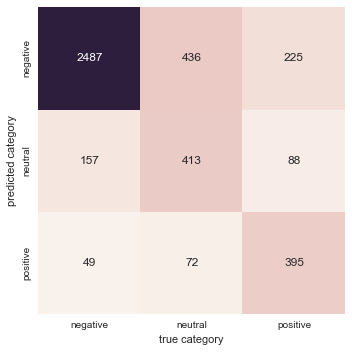

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

plt.style.use('classic')
%matplotlib inline
import seaborn as sns; sns.set()

mat = confusion_matrix(y_test, categories)

labels = ['negative','neutral','positive']

sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=labels, yticklabels=labels)
plt.xlabel('true category')
plt.ylabel('predicted category');

In [26]:
# Now we want to use an ANN to predict the airline_sentiment
# Create a new dataframe dataNN that contains the necessary columns to do this
# We are only going to use those tweets with airline_sentiment_confidence >= 0.5
dataNN = data[data['airline_sentiment_confidence'] >= 0.5][['airline_sentiment','text']]
dataNN.head()
dataNN.shape

(14404, 2)

In [27]:
# Replace the airline_sentiment negative by 0, neutral by 1 and positive by 2
def transform(sentiment):
    values = {'negative': 0, 'neutral': 1, 'positive': 2}
    return values[sentiment]

dataNN['airline_sentiment'] = dataNN['airline_sentiment'].map(transform)
dataNN.head()
dataNN.shape

(14404, 2)

In [28]:
# Create X and y
# Apply TfidfVectorizer

X = dataNN.drop('airline_sentiment', axis = 1)
y = dataNN['airline_sentiment']

from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X = vec.fit_transform(dataNN['text'])
print(X.shape)
print(y.shape)

(14404, 14278)
(14404,)


C:\Program Files\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [29]:
# Split into train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [30]:
# one-hot encoding using keras' numpy-related utilities
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
print(y_train.shape)
y_test = to_categorical(y_test)
print(y_test.shape)

C:\Program Files\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(10082, 3)
(4322, 3)


In [31]:
# keras imports for building our neural network
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation

# building a linear stack of layers with the sequential model
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(14278,)))
model.add(Activation('sigmoid'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.2))

model.add(Dense(3))
model.add(Activation('softmax'))

Using TensorFlow backend.


In [32]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [33]:
# training the model and saving metrics in history, use epochs = 10
model.fit(X_train, y_train,epochs=10,verbose=2)  

Epoch 1/10
 - 61s - loss: 0.9245 - accuracy: 0.6225
Epoch 2/10
 - 58s - loss: 0.6993 - accuracy: 0.7032
Epoch 3/10
 - 59s - loss: 0.5285 - accuracy: 0.7858
Epoch 4/10
 - 57s - loss: 0.4305 - accuracy: 0.8334
Epoch 5/10
 - 57s - loss: 0.3539 - accuracy: 0.8647
Epoch 6/10
 - 58s - loss: 0.3107 - accuracy: 0.8825
Epoch 7/10
 - 59s - loss: 0.2687 - accuracy: 0.9019
Epoch 8/10
 - 59s - loss: 0.2382 - accuracy: 0.9162
Epoch 9/10
 - 56s - loss: 0.2235 - accuracy: 0.9157
Epoch 10/10
 - 57s - loss: 0.2086 - accuracy: 0.9238


In [34]:
# saving the model
import os
save_dir = "./"
model_name = 'keras_airline.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)

In [35]:
# What is the Loss and Accuracy?
mnist_model = load_model('keras_airline.h5')
loss, accuracy = mnist_model.evaluate(X_test, y_test)

print("Test Loss", loss)
print("Test Accuracy", accuracy)

4322/4322 [==============================] - 2s 442us/step
Test Loss 0.7133749772530361
Test Accuracy 0.7371587157249451


In [36]:
model = load_model('keras_airline.h5')

predictions = model.predict(X_test)

# see which were predicted correctly and which not
# How many were predicted correctly and how many were not?
# np.nonzero returns a tuple of arrays, one for each dimension of a, 
# containing the indices of the non-zero elements in that dimension.
correct_indices = np.nonzero(predictions == y_test)[0]
incorrect_indices = np.nonzero(predictions != y_test)[0]

print("Correcte indices " + str(len(correct_indices)))
print("Incorrecte indices " + str(len(incorrect_indices)))

Correcte indices 0
Incorrecte indices 12966


In [37]:
print(vec.get_feature_names())

['00', '000', '000114', '000419', '000ft', '000lbs', '0011', '0016', '00a', '00am', '00p', '00pm', '01', '0162389030167', '0162424965446', '0162431184663', '0167560070877', '0185', '01ldxn3qqqâ', '01pm', '02', '0200', '03', '0316', '0372389047497', '04', '0400', '04sdytt7zd', '05', '0510', '0530', '05am', '05pm', '06', '0600', '0638', '0671', '07', '0736', '0769', '07p', '07xhcacjax', '08', '0985', '0bjnz4eix5', '0ewj7oklji', '0hmmqczkcf', '0hxlnvzknp', '0jjt4x3yxg', '0jutcdrljl', '0kn7pjelzl', '0liwecasoe', '0pdntgbxc6', '0prgysvurm', '0wbjawx7xd', '10', '100', '1000', '1000cost', '1001', '1002', '1007', '1008', '101', '1016', '1019', '1020', '1024', '1025', '1027', '1028', '103', '1030pm', '1032', '1038', '104', '1041', '1046', '105', '1050', '1051', '1058', '106', '1065', '1071', '1074', '1079871763', '108', '1080', '1081', '1086', '108639', '1089', '1098', '1099', '10a', '10am', '10d', '10f', '10hrs', '10m', '10min', '10mins', '10p', '10pm', '10th', '10tmthvfdc', '10voucherwhatajok